# Testing MPASOMap

This notebook tests the functionality of the `MPASOMap` object with mesh defined by the `MPASMesh` object.

In [1]:
import sys
import os
sys.path.append("..")
from mpasview import *

In [2]:
# mesh file
meshroot = os.environ['HOME']+'/data/mpas/grids'
meshfile = meshroot+'/oEC60to30v3_60layer.170905.meshonly.nc'

In [3]:
# define MPASMesh
mpasmesh = MPASMesh(name='oEC60to30v3', filepath=meshfile)
print(mpasmesh)

<class 'mpasview.data.MPASMesh'>:
        name: oEC60to30v3
      ncells: 235160
      nedges: 714274
   nvertices: 478835
   on sphere: True


## Plot the bathymetry (on cells)

The bathymetry is an example of variables centered on cells.

In [4]:
# load data
varname = 'bottomDepth'
data1 = xr.open_dataset(meshfile)[varname].data

In [5]:
# define MPASOMap
mpasomap1 = MPASOMap(data=data1, name='Bottom depth', units='m',
                     mesh=mpasmesh)
print(mpasomap1)

<class 'mpasview.data.MPASOMap'> (size=235160):
    name: Bottom depth
   units: m
    data: [82.471041 5476.726684 ... 4525.246844 5499.990273]
     lon: [185.336578 129.033944 ... 262.142174 143.990351]
     lat: [62.198095 18.467407 ... -68.167836 11.803854]
    mesh: oEC60to30v3
position: cell


### Global map

Only `contour` map is supported for global map. A warning is raised if `ptype` is set to `pcolor`.

Plotting 'Bottom depth (m)' map in the 'Global' (235160 data points)...


../mpasview/data.py:677: UserWarning: 'pcolor' on 'Global' region not supported, using 'contourf' instead...


CPU times: user 2.89 s, sys: 115 ms, total: 3.01 s
Wall time: 3 s


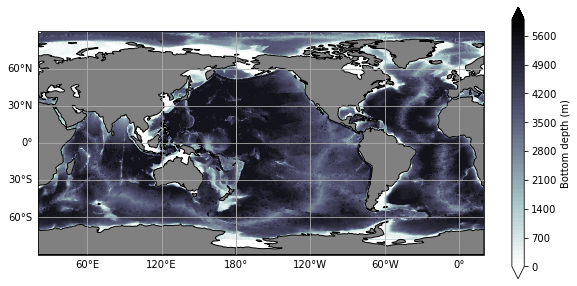

In [6]:
%%time
plt.figure(figsize=[10,5])
levels = np.linspace(0, 6000, 61)
fig = mpasomap1.plot(region='Global', levels=levels, cmap='bone_r',
                     ptype='pcolor')

### Labrador Sea

Testing pseudocolor plot by setting `ptype='pcolor'`. 

Plotting 'Bottom depth (m)' map in the 'LabSea' (5633 data points)...
CPU times: user 833 ms, sys: 19.6 ms, total: 852 ms
Wall time: 660 ms


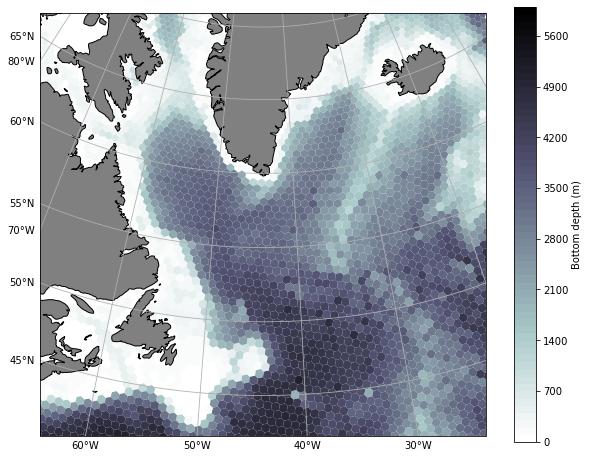

In [7]:
%%time
plt.figure(figsize=[10,8])
levels = np.linspace(0, 6000, 61)
fig = mpasomap1.plot(region='LabSea', levels=levels, cmap='bone_r',
                 ptype='pcolor')

### Tropical Atlantic

Testing longitude wrapping across lon=0. 

Plotting 'Bottom depth (m)' map in the 'TropicalAtlantic' (25172 data points)...
CPU times: user 3.59 s, sys: 108 ms, total: 3.7 s
Wall time: 2.68 s


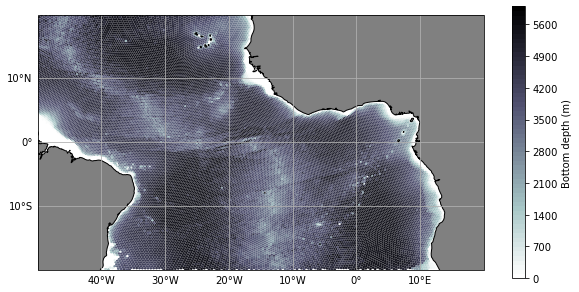

In [8]:
%%time
plt.figure(figsize=[10,5])
levels = np.linspace(0, 6000, 61)
fig = mpasomap1.plot(region='TropicalAtlantic', levels=levels,
                     cmap='bone_r', ptype='pcolor')

### Arctic

Testing polar plot. 

Plotting 'Bottom depth (m)' map in the 'Arctic' (19805 data points)...
CPU times: user 2.91 s, sys: 64.7 ms, total: 2.97 s
Wall time: 2.35 s


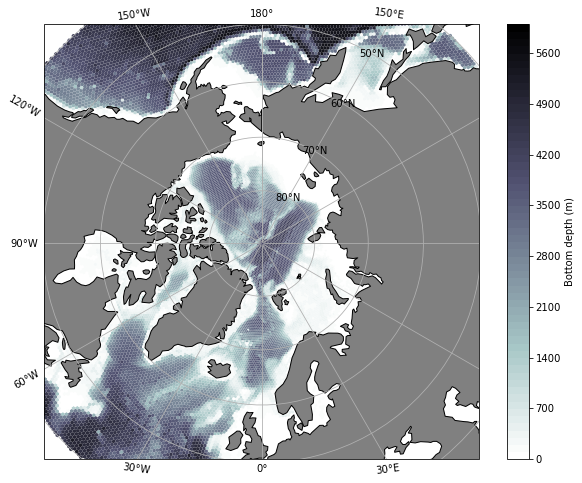

In [9]:
%%time
plt.figure(figsize=[10,8])
levels = np.linspace(0, 6000, 61)
fig = mpasomap1.plot(region='Arctic', levels=levels, cmap='bone_r',
                 ptype='pcolor')

## Plot the area of the dual cell (triangles centered on vertices)

The area of the dual cell is an example of variables centered on vertices by setting `position='vertex'`.

In [10]:
# load data
varname = 'areaTriangle'
data2 = xr.open_dataset(meshfile)[varname].data

In [11]:
# define MPASOMap
mpasomap2 = MPASOMap(data=data2, name='Due mesh area', units='m$^2$',
                     position='vertex', mesh=mpasmesh)

### Global map

Only `contour` map is supported for global map.

Plotting 'Due mesh area (m$^2$)' map in the 'Global' (478835 data points)...
CPU times: user 3.95 s, sys: 178 ms, total: 4.13 s
Wall time: 4.13 s


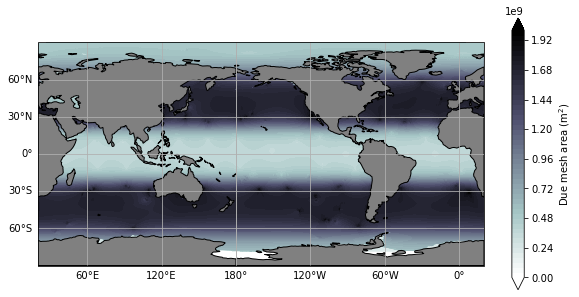

In [12]:
%%time
plt.figure(figsize=[10,5])
levels = np.linspace(0, 2e9, 51)
fig = mpasomap2.plot(region='Global', levels=levels, cmap='bone_r')

### Labrador Sea

Testing pseudocolor plot by setting `ptype='pcolor'`. 

Plotting 'Due mesh area (m$^2$)' map in the 'LabSea' (11880 data points)...
CPU times: user 1.48 s, sys: 30.4 ms, total: 1.51 s
Wall time: 1.23 s


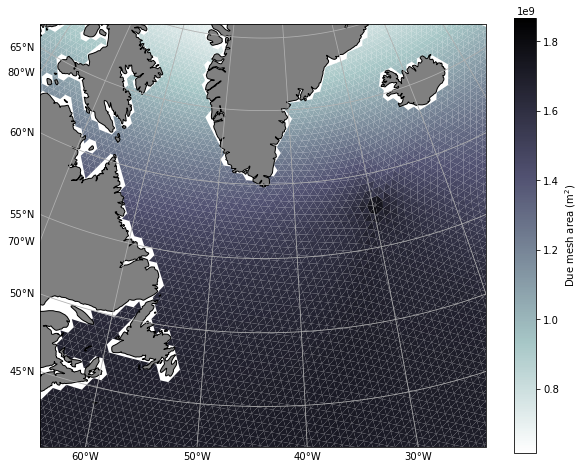

In [13]:
%%time
plt.figure(figsize=[10,8])
fig = mpasomap2.plot(region='LabSea', cmap='bone_r', ptype='pcolor')